<a href="https://colab.research.google.com/github/richeym-umich/workshops/blob/main/Machine_Learning_Tools_and_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas Example
In the following example, we'll go through some data manipulation with Pandas

First, we'll import the pandas module

In [1]:
import pandas as pd

Next, we'll make a simple data frame. A data frame is made up of columns with titles. In this case, we have two columns: Country and Rank

In [2]:
data = pd.DataFrame({'Country': ['Russia', 'Colombia', 'Chile', 'Ecuador', 'Nigeria'], 'Rank':[121, 40, 100, 130, 11]})
data

,Country,Rank
0,Russia,121
1,Colombia,40
2,Chile,100
3,Ecuador,130
4,Nigeria,11


We can sort the values by a specific column. This demonstrates one of many simple functions that can be performed with a dataframe

In [3]:
data.sort_values(by=['Rank'], ascending=True, inplace=False)

,Country,Rank
4,Nigeria,11
1,Colombia,40
2,Chile,100
0,Russia,121
3,Ecuador,130


Next, let's make a new data frame that shows the type of meat and number of ounces a deli counter sold in an hour. 

In [45]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham'], 'ounces':[4,3,12,6,7.5, 8, 3, 5]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0


We can add a column showing what animal each type of meat came from. To do this, we can create a map and then apply the map to a column of the dataframe. We can add the result as a new column. 

In [46]:
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami':'cow',
    'corned beef':'cow',
    'honey ham':'pig'
}
data['food'] = data['food'].str.lower()
data['animal'] = data['food'].map(meat_to_animal)


Finally, we can group purchases together based on type of meat. In this case, we have multiple entries for bacon and pastrami. We can combine these rows into one row, and apply a mean function to the number of ounces to show the mean number of ounces of each purchase at the deli counter. We can also display the total number of ounces in another column. 

In [47]:
data['total'] = data['ounces']
data = data.groupby('food').agg({'ounces': 'mean', 'animal': 'first', 'total':'sum'}).reset_index()
data.columns = ['mean ounces' if x=='ounces' else x for x in data.columns]

data

,food,mean ounces,animal,total
0,bacon,8.0,pig,24.0
1,corned beef,7.5,cow,7.5
2,honey ham,5.0,pig,5.0
3,pastrami,4.5,cow,9.0
4,pulled pork,3.0,pig,3.0


### Scikit-Learn Example
In the following example, we'll go through importing some python libraries and working with a provided dataset to demonstrate a simple computer vision problem

To start, we'll import some essential libraries for visualizing our results and working with provided datasets. Note that we also import an svm classifier.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Next, we import the digits dataset. This dataset contains images of handwritten digits. In this example, we'll be teaching a machine to recognize the handwritten digits.

In [ ]:
digits = datasets.load_digits()

Using matplotlib, we can visualize some of our training data that we just imported. These images have labels that are shown above the image

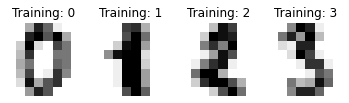

In [ ]:
_, axes = plt.subplots(1,4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image,label) in zip(axes[:], images_and_labels[:4]):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title('Training: %i' % label)

Next, we prepare our data for training by putting it into the correct format for an svm classifier. 

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

We create an SVC classifier with a gamma value of .001. Gamma dictates how to scale each feature that is being considered.

In [ ]:
classifier = svm.SVC(gamma=.001)

After creating the classifier, we split our data in training data and testing data. This is done by a predefined function, where we dictate how large of a testing size to have. Then, we fit our classifier to our data. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Once the classifier is fit to the training data, we can test it with test data by calling the predict function. 

In [ ]:
predicted = classifier.predict(x_test)

Finally, we visualize some predictions of the test data. 

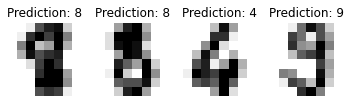

In [ ]:
_, axes = plt.subplots(1,4)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[:], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

### Tensorflow/Keras Example

In [ ]:
import imutils

def sliding_window(image, step, ws):
  #slide window across image
  for y in range(0, image.shape[0] - ws[1], step):
    for x in range(0, image.shape[1] - ws[0], step):
      #yield the current window
      yield(x, y, image[y:y+ws[1], x:x+ws[0]])

def image_pyramid(image, scale=1.5, minSize=(224,224)):